In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import emproperties as emp
import inductance as inp

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context("poster")
sns.set_style("ticks",{"xtick.direction" : u"in",
                       "ytick.direction" : u"in"})
sns.set_palette(sns.color_palette("coolwarm", 4))

In [2]:
a = 5e-06
b = 6e-06
d = 50e-09
pen_depth = 33.3e-09

em = emp.EMProperties(a=a, b=b, d=d, pen_depth=pen_depth)
ind = inp.Inductance(a=a, b=b, d=d, pen_depth=pen_depth)

xlist = np.arange(-8e-06,8e-06,0.01e-06)
Kz = em.current_density(xlist)
Hy = em.complex_field(xlist)

/Users/garethjones/PythonScripts/SuperconductorAnalyticCalcs/emproperties.py:33: RuntimeWarning: invalid value encountered in sqrt
  Hy.append( -self._a / ( (abs(xlist[i]) * np.sqrt(mod1 * mod2)) ) )
/Users/garethjones/PythonScripts/SuperconductorAnalyticCalcs/emproperties.py:35: RuntimeWarning: invalid value encountered in sqrt
  Hy.append( self._a / ( (abs(xlist[i]) * np.sqrt(mod1 * mod2)) ) )


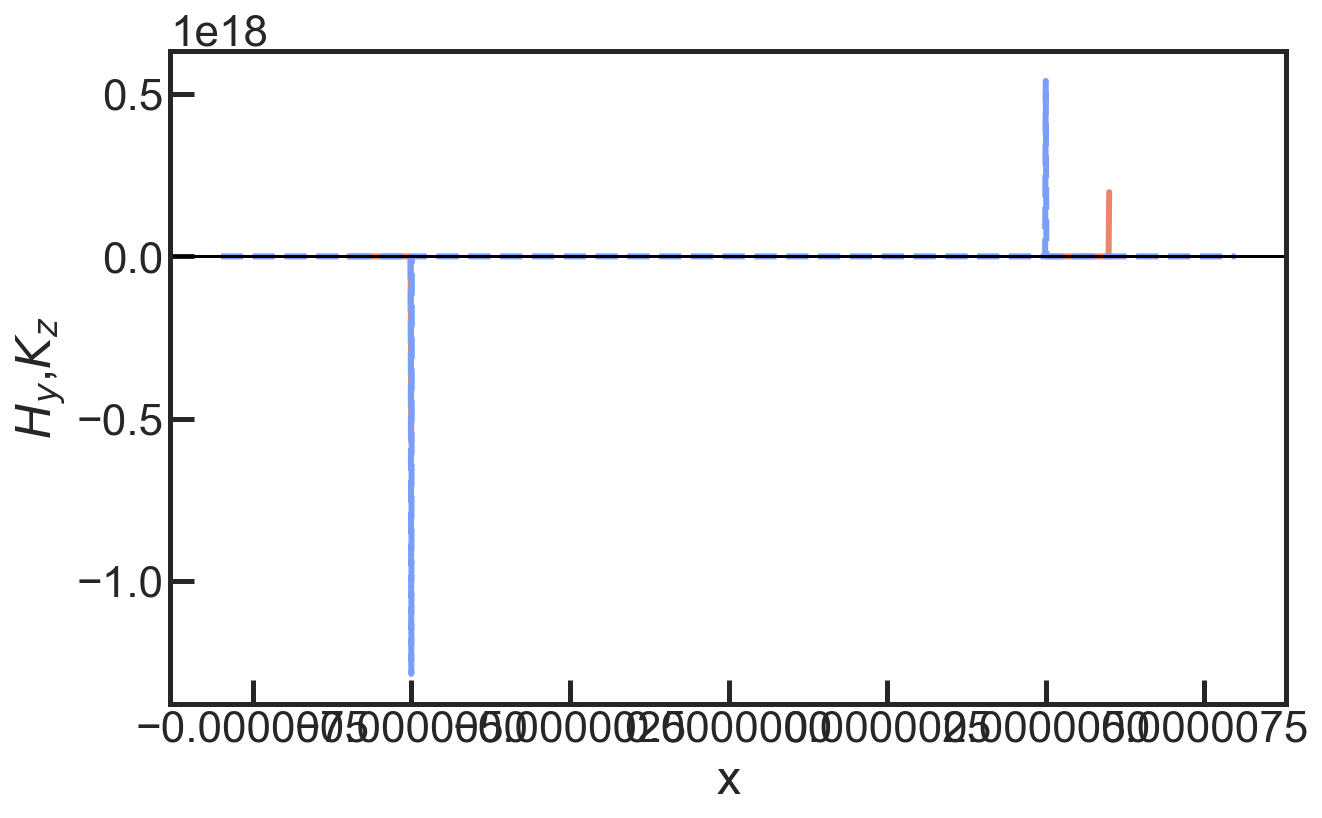

In [3]:
import matplotlib.patches as patches

fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
ax0.plot(xlist,Hy,color=sns.color_palette()[3])
ax0.plot(xlist,Kz,'--')
# ax0.set_xlim(-4,4)
# ax0.set_ylim(-6,6)
ax0.set_xlabel('x')
ax0.set_ylabel('$H_{y}$,$K_{z}$')

ax0.axhline(0, color='k',linewidth=1.5)

plt.savefig('figs/ClemFig1_Hy_and_Kz.pdf',bbox_inches=None)
plt.show()

In [4]:
xsc = np.arange(-8e-06,8e-06,0.01e-06)
supercurrent = em.supercurrent(xsc)

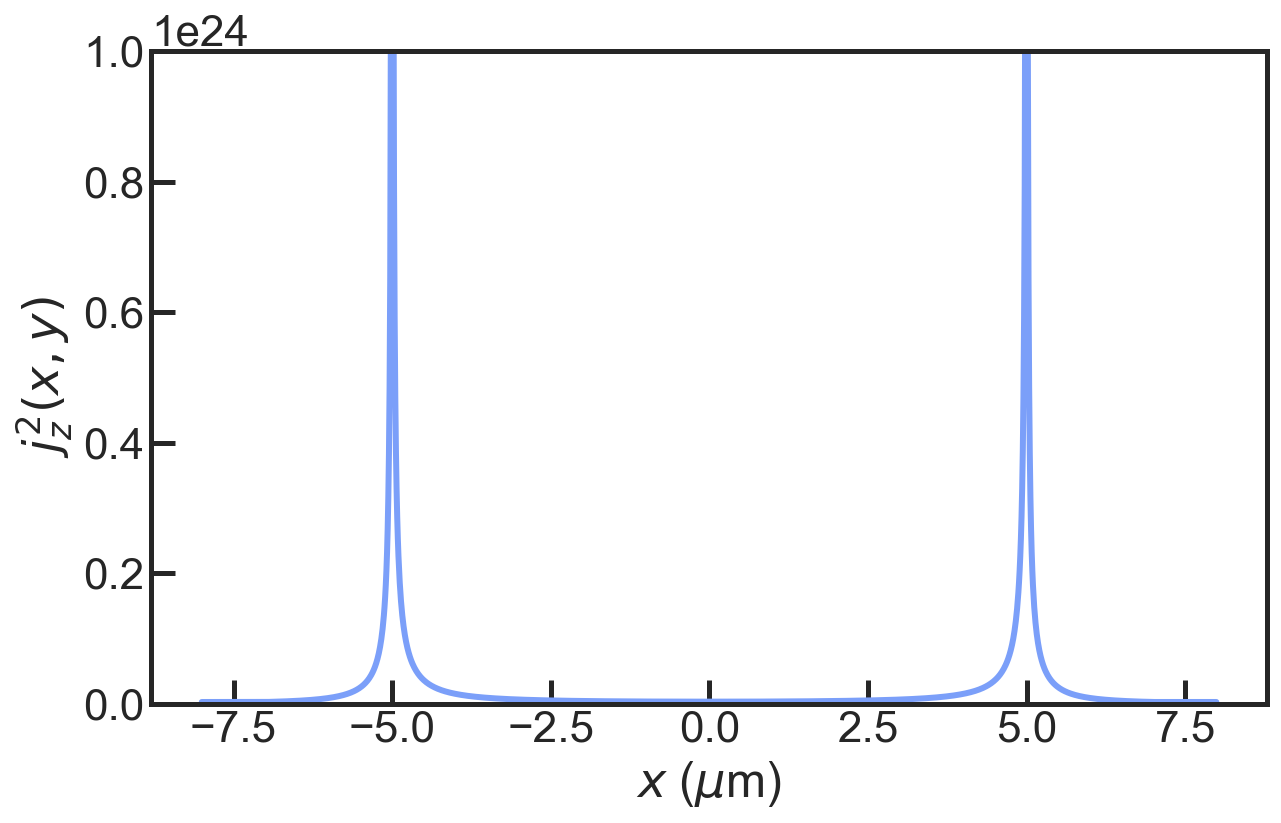

In [5]:
fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
ax0.plot(xsc*1e06,supercurrent)
ax0.set_ylim(0,1e24)
ax0.set_xlabel("$x$ ($\mu$m)")
ax0.set_ylabel("$j^{2}_{z}(x,y)$")

plt.show()

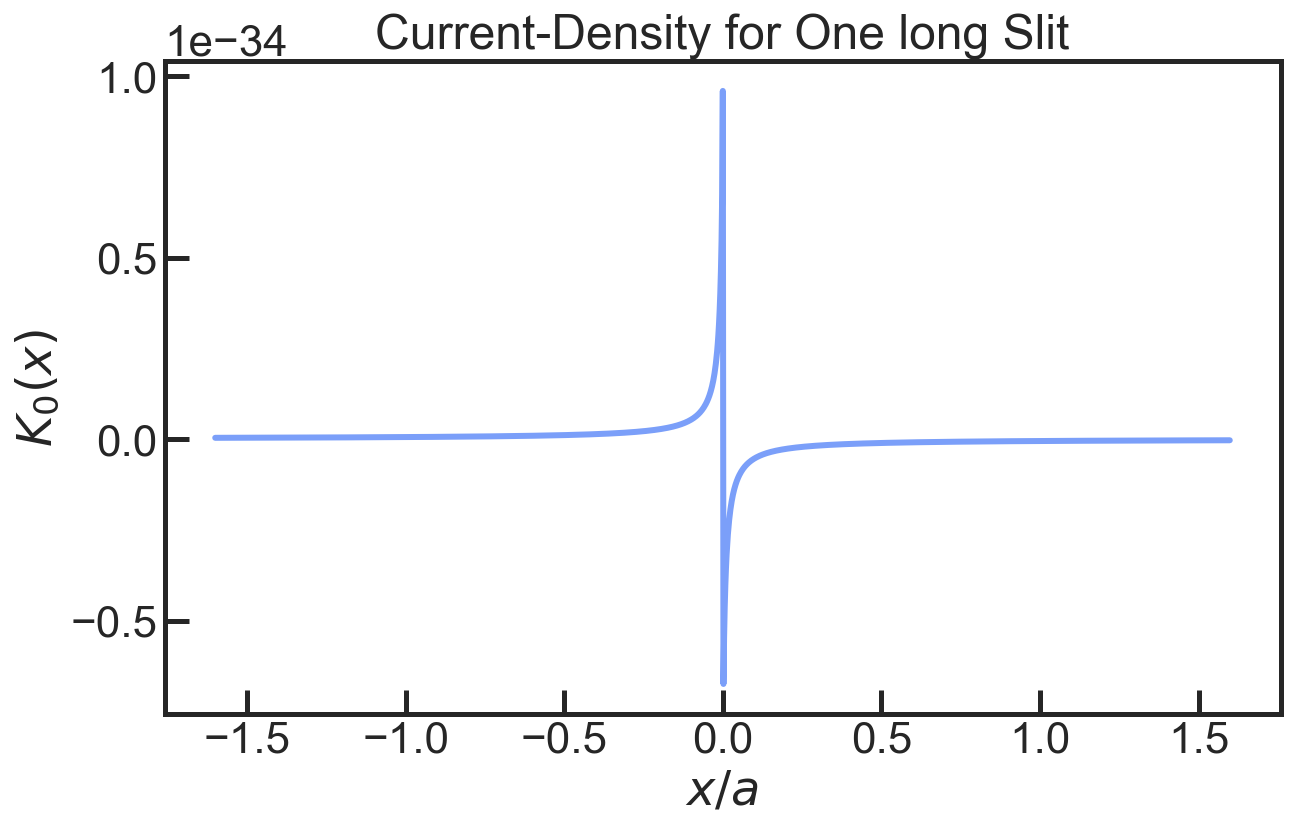

In [6]:
# x = np.arange(-.5e-06,.5e-06,0.01e-06)

current_density_one_slit = em.current_density_one_slit(xsc)

fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
ax0.plot(xsc/em.a,np.array(current_density_one_slit)*em.a)

ax0.set_xlabel('$x/a$')
ax0.set_ylabel('$K_{0}(x)$')
ax0.set_title('Current-Density for One long Slit')
# plt.savefig('figs/current_density_one_slit.pdf',bbox_inches=None)
plt.show()

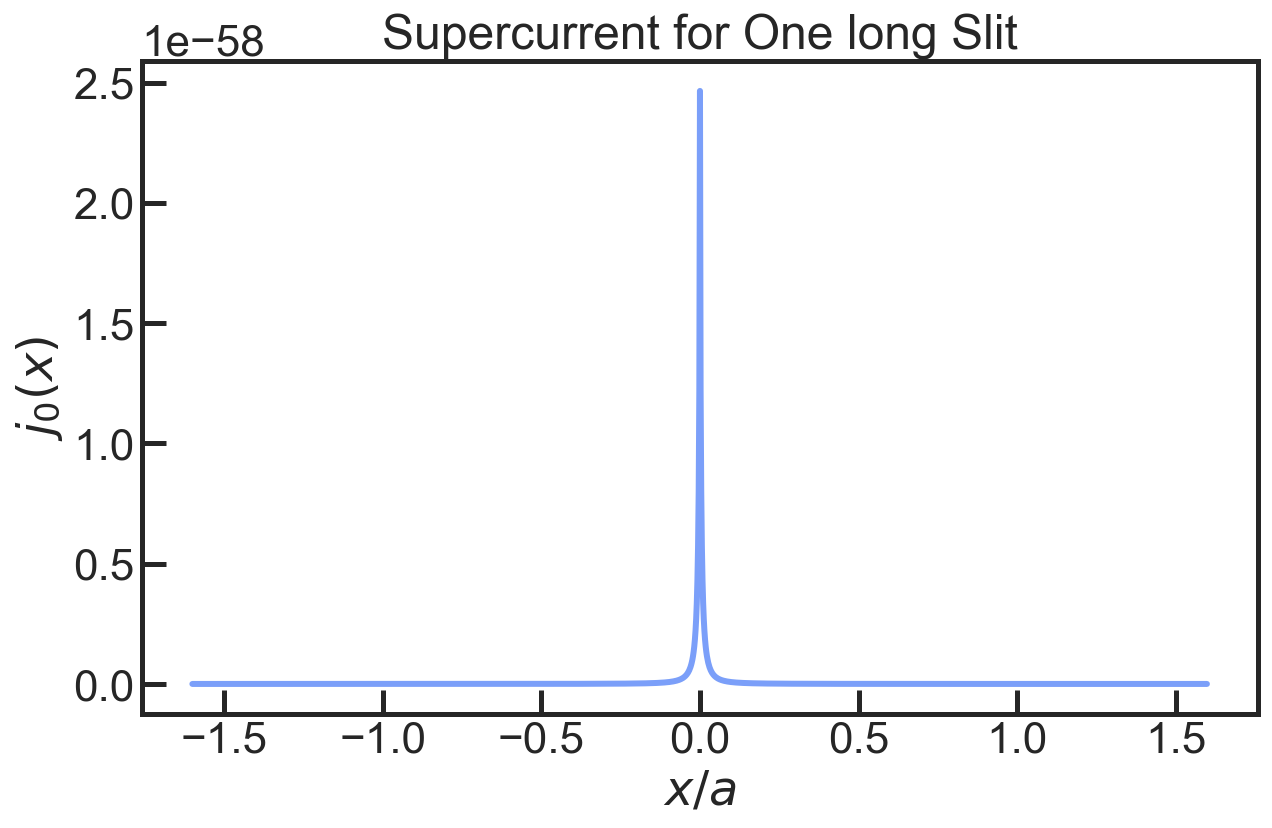

In [7]:
# x = np.arange(-.5e-06,.5e-06,0.01e-06)

# # plt.figure(figsize=(10,6))
# # plt.plot(x/em.a,em.supercurrent(x))
# # plt.show()



fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
ax0.plot(xsc/em.a,em.supercurrent_one_slit(xsc))

ax0.set_xlabel('$x/a$')
ax0.set_ylabel('$j_{0}(x)$')
ax0.set_title('Supercurrent for One long Slit')
# plt.savefig('figs/supercurrent_one_slit.pdf',bbox_inches=None)
plt.show()